<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> American Sign Language Classification ✊🖖📷 🚀 </h1> </div>

- American Sign Language Classification is the process of mapping images or videos of American Sign Language (ASL) into specific sign language expressions. To accomplish this, CNN models are employed to detect and extract important features from the input images or videos. Subsequently, through training on large datasets containing images or videos of various ASL expressions, the CNN model learns how to accurately classify different sign language expressions. This process is particularly useful in developing communication support applications for the deaf or those learning sign language.

![hand signs.png](https://www.frederickinterpreting.com/wp-content/uploads/2021/04/asl.jpg)

# **1. Data visualization**

<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black">1. Data visualization </h3> </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os
import seaborn as sns

In [2]:
train_path = '/kaggle/input/american-sign-language-dataset/asl_dataset'

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">1.1. Number of training data </h4> </div>

In [3]:
# Get the names of subfolders in train path
class_folders =  os.listdir(train_path)

image_counts = {}

for class_folder in class_folders:
    path = os.path.join(train_path, class_folder)

    # Count the number of images in the folder
    image_count = len(os.listdir(path))

    # Get the class number from the name directory
    class_number_train = class_folders.index(class_folder)

    # Save the number of images to the dictionary
    image_counts[class_folder] = image_count

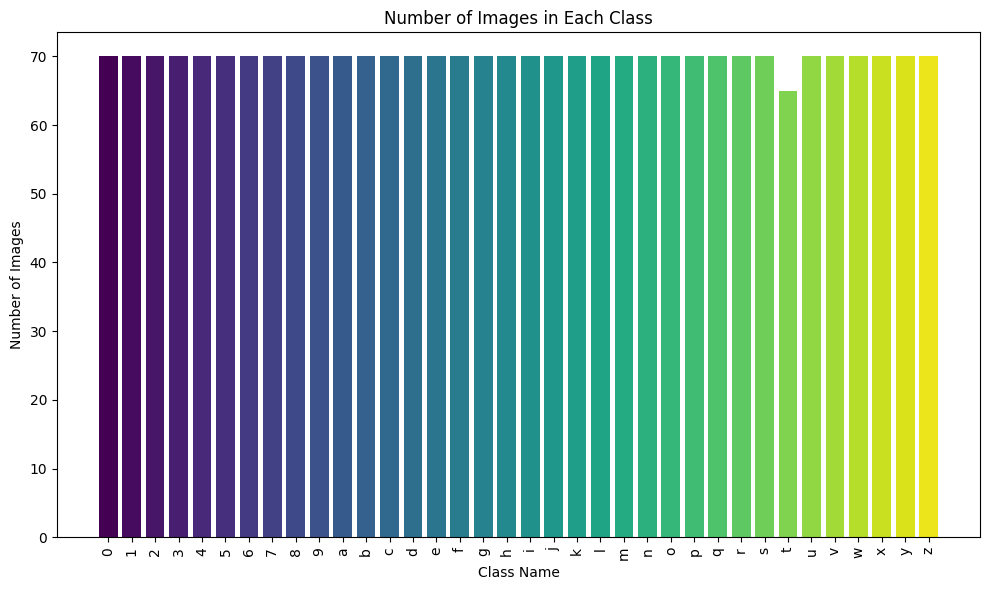

In [4]:
# Choose a color map from the matplotlib library
color_map = cm.viridis

# Sort the keys (class names) of the dictionary in alphabetical order
sorted_keys = sorted(image_counts.keys())

# Create a color array based on the number of photos in each layer
colors = [color_map(i / len(image_counts)) for i in range(len(image_counts))]

# Draw a chart with the created color array
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_keys, [image_counts[key] for key in sorted_keys], color=colors)
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">1.2. Types of sign languages </h4> </div>

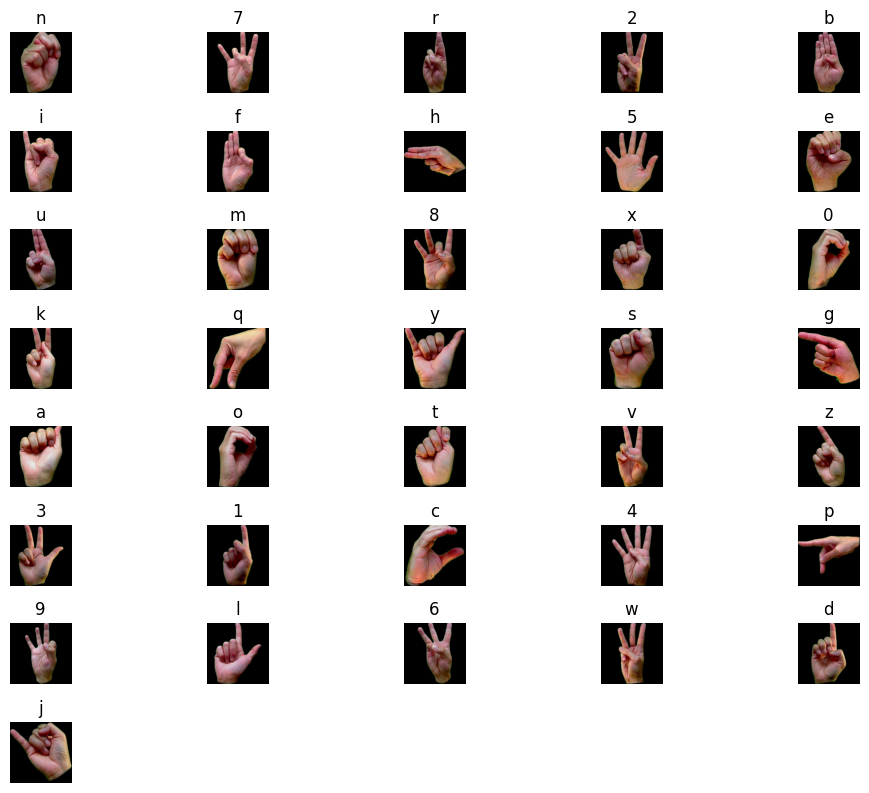

In [5]:
# Set the size of the drawing
plt.figure(figsize=(10, 10))

# Loop through each subfolder
for i, folder in enumerate(class_folders):
    path = os.path.join(train_path, folder)
    
    # Set subplot index
    plt.subplot(10, 5, i+1)
    
    # Loop through each file in the directory
    for j, img in enumerate(os.listdir(path)):
        # Make sure to display only a single image per folder
        if j >= 1:
            break
        
        img_array = cv2.imread(os.path.join(path,img))
        
        # Show image
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.title(folder)
        plt.axis('off')

# Set space between rows and columns
plt.subplots_adjust(hspace=5, wspace=0.5)
plt.tight_layout()
plt.show()

# **2. Create training and validation datasets**

<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black">2. Create training and validation datasets </h3> </div>

In [6]:
import tensorflow as tf

2024-05-09 08:41:42.278306: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 08:41:42.278437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 08:41:42.398059: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  rotation_range=10,
                                                                  width_shift_range=0.1,
                                                                  height_shift_range=0.1,
                                                                  shear_range=0.15,
                                                                  zoom_range=0.15,
                                                                  horizontal_flip=False,
                                                                  vertical_flip=False,
                                                                  fill_mode='nearest',
                                                                  validation_split=0.2,
                                                                  )

In [8]:
train_images = train_generator.flow_from_directory(train_path,
                                                   target_size=(150, 150),
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   subset='training',
                                                  )

val_images = train_generator.flow_from_directory(train_path,
                                                 target_size=(150,150),
                                                 class_mode='categorical',
                                                 batch_size=32,
                                                 subset='validation',
                                                )

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


# **3. Build InceptionV3 Model**

<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black">3. Build InceptionV3 Model</h3> </div>

In [9]:
from tensorflow.keras.models import Model, Sequential

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">3.1. Use transfer learning</h4> </div>

In [10]:
# Load the pre-trained model
pre_trained_model_InceptionV3 = tf.keras.applications.InceptionV3(
                        include_top=False,
                        pooling='avg',
                        weights="imagenet",
                        input_shape=(150,150,3),
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### **Note : You can run this line of code to get the corresponding final layer to build the model**

In [11]:
# pre_trained_model_InceptionV3.summary()

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">3.2. Use Warm up and Fine tuning technique</h4> </div>

* **Note :** 
* If you want to achieve fast convergence efficiency, you will use Warm up
* To increase accuracy we use Fine turning technique

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">Warm up technique</h4> </div>

* Warm up is a necessary process for the model to converge faster. The Warm up process freezes the CNN layers so that their coefficients do not change and retrains only on the last Fully Connected Layers. The purpose of Warm up is to retain the high-level features learned from the pre-trained model, which is good because they are trained on a larger and more accurate data set. Higher accuracy than random coefficient initialization.*

In [12]:
# for layer in pre_trained_model_InceptionV3.layers:
#     layer.trainable = False

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">Fine tuning technique</h4> </div>

* The main purpose of warming up the model is for the model to converge faster to the global optimal value.

* After the model reaches the optimal threshold on Fully Connected Layers, it will be difficult for us to increase the accuracy further.

* Now we will need to unfreeze the layers of the base network and train the model on all the layers from the pretrained-model. This process is called fine tuning.

In [13]:
for layer in pre_trained_model_InceptionV3.layers:
    layer.trainable = True

* You can choose arbitrarily as long as it has enough characteristics and can improve performance
* Here I am using mixed7 class

In [14]:
last_layer_InceptionV3 = pre_trained_model_InceptionV3.get_layer('mixed7')
last_output_InceptionV3 = last_layer_InceptionV3.output

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">3.3. InceptionV3 training </h4> </div>

In [15]:
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Flatten,Conv2D,MaxPool2D,Dropout,Activation
from keras.optimizers import Adam

In [16]:
optimizer = Adam(learning_rate=0.0001,  # Learning speed
                beta_1=0.9,             # Beta coefficient1
                beta_2=0.999,           # Beta coefficient2
                )    

In [17]:
x = layers.Flatten()(last_output_InceptionV3)
x = layers.BatchNormalization()(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.BatchNormalization()(x)
output = layers.Dense(36,activation='softmax')(x)

model_trans_InceptionV3 = Model(pre_trained_model_InceptionV3.input,output)

model_trans_InceptionV3.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
model_trans_InceptionV3.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 13,954,180 (53.23 MB)

 Trainable params: 13,859,716 (52.87 MB)

 Non-trainable params: 94,464 (369.00 KB)

In [19]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [20]:
callbacks =myCallback()

print('----------------------------Model is being built......................\n')
history_Incep = model_trans_InceptionV3.fit(train_images,
                    epochs=100,
                    validation_data=val_images,
                    verbose=1,
                    callbacks = [callbacks]
                   )
print('\n----------------------------Model completed......................\n')

----------------------------Model is being built......................

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/63 ━━━━━━━━━━━━━━━━━━━━ 1:10:16 68s/step - accuracy: 0.0312 - loss: 4.1952

I0000 00:00:1715244184.457816     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715244184.547790     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.2828 - loss: 2.8649

W0000 00:00:1715244241.883809     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.2860 - loss: 2.8531 - val_accuracy: 0.5805 - val_loss: 2.7177
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.8335 - loss: 0.9812 - val_accuracy: 0.8211 - val_loss: 1.8799
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - accuracy: 0.9091 - loss: 0.6097 - val_accuracy: 0.8946 - val_loss: 1.2522
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.9450 - loss: 0.4156 - val_accuracy: 0.9006 - val_loss: 0.8210
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.9570 - loss: 0.3180 - val_accuracy: 0.9245 - val_loss: 0.5506
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - accuracy: 0.9608 - loss: 0.2734 - val_accuracy: 0.9225 - val_loss: 0.3992
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 252ms/step - accuracy: 0.9829 - loss: 0.1921 - val_accuracy: 0.9443 - val_loss: 0.3380
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.9872 - loss: 0.1730 - val_accuracy: 

# **4. Build ResNet50 Model**

<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black">4. Build ResNet50 Model</h3> </div>

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">4.1. Use transfer learning</h4> </div>

In [21]:
pre_trained_model_ResNet50 = tf.keras.applications.ResNet50(
                        include_top=False,
                        weights="imagenet",
                        input_shape=(150,150,3),
                        pooling='avg',
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [22]:
# pre_trained_model_ResNet50.summary()

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">4.2. Use Warm up and Fine tuning technique</h4> </div>

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">Warm up</h4> </div>

In [23]:
# for layer in pre_trained_model_ResNet50.layers:
#     layer.trainable = False

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">Fine tuning</h4> </div>

In [24]:
for layer in pre_trained_model_ResNet50.layers:
    layer.trainable = True

In [25]:
last_layer_ResNet50 = pre_trained_model_ResNet50.get_layer('conv5_block1_out')
last_output_ResNet50 = last_layer_ResNet50.output

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">4.3. ResNet50 training</h4> </div>

In [26]:
x = layers.Flatten()(last_output_ResNet50)
x = layers.BatchNormalization()(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
output = layers.Dense(36,activation='softmax')(x)

model_trans_ResNet50 = Model(pre_trained_model_ResNet50.input,output)

model_trans_ResNet50.compile(optimizer=Adam(learning_rate=0.00001,beta_1=0.9,beta_2=0.999),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model_trans_ResNet50.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 21,413,988 (81.69 MB)

 Trainable params: 21,270,372 (81.14 MB)

 Non-trainable params: 143,616 (561.00 KB)

In [28]:
callbacks =myCallback()

print('----------------------------Model is being built......................\n')
history_Res = model_trans_ResNet50.fit(train_images,
                    epochs=150,
                    validation_data=val_images,
                    verbose=1,
                    callbacks = [callbacks]
                   )
print('\n----------------------------Model completed......................\n')

----------------------------Model is being built......................

Epoch 1/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 996ms/step - accuracy: 0.0439 - loss: 4.2608 - val_accuracy: 0.0417 - val_loss: 3.9010
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.1230 - loss: 3.5084 - val_accuracy: 0.0517 - val_loss: 3.9177
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.1963 - loss: 3.0286 - val_accuracy: 0.0278 - val_loss: 3.9528
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.2663 - loss: 2.6848 - val_accuracy: 0.0278 - val_loss: 4.0680
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.3335 - loss: 2.4158 - val_accuracy: 0.0159 - val_loss: 4.2100
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 264ms/step - accuracy: 0.3780 - loss: 2.2363 - val_accuracy: 0.0219 - val_loss: 4.2440
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - accuracy: 0.4451 - loss: 2.0589 - val_accuracy: 0.0139 - val_loss: 4.0743
Epoch 8/150
63/63

# **5. Result**

<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black">5. Result</h3> </div>

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">5.1. InceptionV3 </h4> </div>

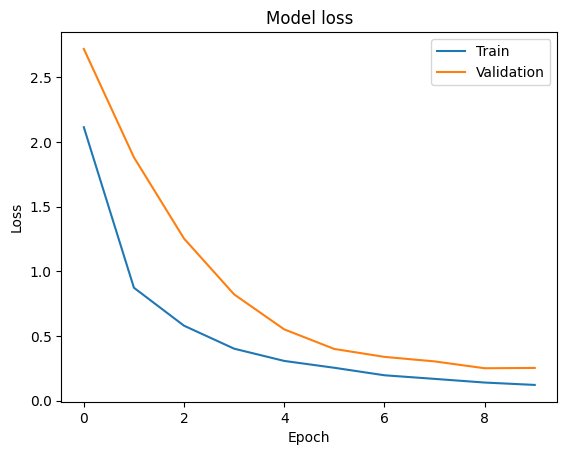

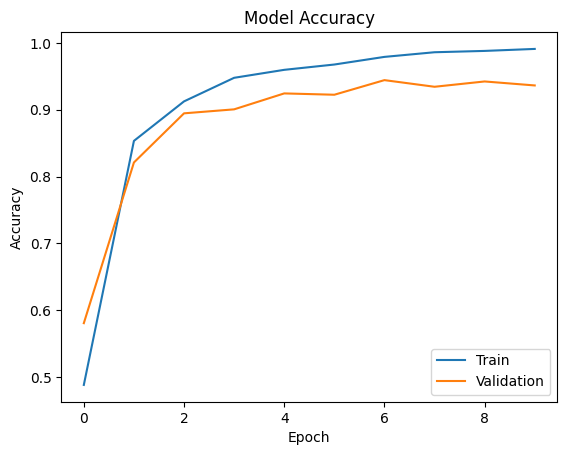

In [29]:
# Plot the loss of training and validation
plt.plot(history_Incep.history['loss'])
plt.plot(history_Incep.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Plot the accuracy of training and validation
plt.plot(history_Incep.history['accuracy'])
plt.plot(history_Incep.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">5.2. ResNet50 </h4> </div>

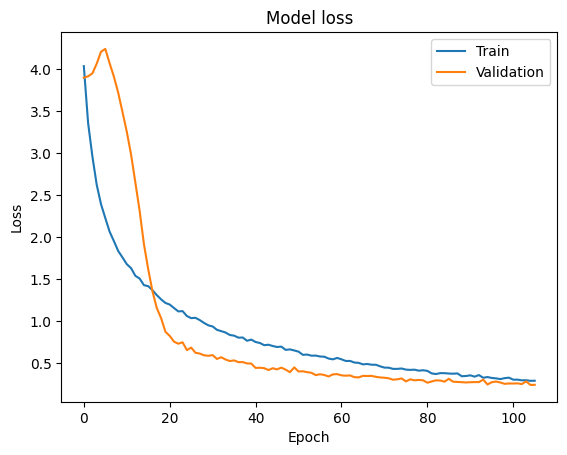

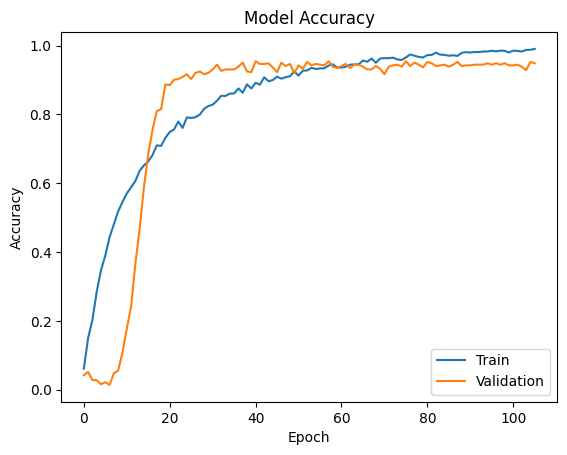

In [30]:
# Plot the loss of training and validation
plt.plot(history_Res.history['loss'])
plt.plot(history_Res.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Plot the accuracy of training and validation
plt.plot(history_Res.history['accuracy'])
plt.plot(history_Res.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# **6. Save model**

<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black">6. Save model</h3> </div>

In [31]:
path_save_model = '/kaggle/working/'

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">6.1. InceptionV3 </h4> </div>

In [32]:
model_trans_InceptionV3.save('model_trans_InceptionV3.h5')

<div class="alert alert-block alert-warning"><h4 style="text-align:Center;color:black">6.2. ResNet50 </h4> </div>

In [33]:
model_trans_ResNet50.save('model_trans_ResNet50.h5')